<a href="https://colab.research.google.com/github/gauduv/PRA3024-MSP/blob/main/W2-placeholder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**READ ME**

due to physical and mental health issues, I have not been able to properly follow the course until now, nor to benefit from any in-person help,nor to have the necessary time to work on this assignment.

thus, this is only a èlaceholder in hope of an additional module to replace the grade.

no need to waste time correcting this. please use the opportunity to take a break.

sincerely, 

Eliott







initialisation, credits to Ayatri Singha, (GWFP, Maastricht University)

In [6]:
! pip install -q 'gwosc==0.5.4'
! pip install -q 'gwpy==2.0.2'
! pip install -q lalsuite
! pip install -q pycbc
! pip install matplotlib

# -- Click "restart runtime" in the runtime menu


In [1]:


import gwosc
print(gwosc.__version__)

import gwpy
print(gwpy.__version__)


# -- download data
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf
# -- for gwpy
from gwpy.timeseries import TimeSeries

# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge3.gwf', 'H1:CHALLENGE3')
import matplotlib.pyplot as plot
import numpy as np

0.5.4
2.0.2
--2022-02-14 23:07:55--  https://www.gw-openscience.org/s/workshop3/challenge/challenge3.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256815066 (245M)
Saving to: ‘challenge3.gwf.5’

challenge3.gwf.5    100%[===================>] 244.92M  23.2MB/s    in 96s     

2022-02-14 23:09:31 (2.55 MB/s) - ‘challenge3.gwf.5’ saved [256815066/256815066]



TimeSeries([-3.04517369e-19, -3.35465069e-19, -3.35210566e-19,
            ...,  4.46471052e-19,  5.07624678e-19,
             4.98623016e-19]
           unit: ct,
           t0: 0.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE3,
           channel: H1:CHALLENGE3)


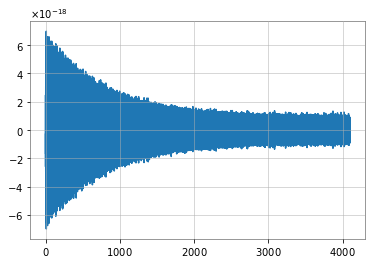

In [5]:
gwpy_strain = TimeSeries.read('challenge3.gwf', channel="H1:CHALLENGE3")
print(gwpy_strain)
%matplotlib inline

fig, Fig = plot.subplots()
Fig.plot(gwpy_strain)
plot.show()

In [8]:
fft = gwpy_strain.fft()
print(fft)

FrequencySeries([ 4.06560903e-24+0.00000000e+00j,
                  7.18172592e-24+2.06456207e-25j,
                  7.59976057e-24+1.06652053e-24j, ...,
                 -4.42661784e-26+1.34225018e-27j,
                 -4.71835878e-26-1.05810046e-27j,
                 -4.62798736e-26+0.00000000e+00j]
                unit: ct,
                f0: 0.0 Hz,
                df: 0.000244140625 Hz,
                epoch: 0.0,
                name: H1:CHALLENGE3,
                channel: H1:CHALLENGE3)


In [13]:
Fig = fft.abs().plot(xscale="log", yscale="log")
Fig.show(warn=False)

fig, Fig = plot.subplots()
Fig.plot(gwpy_strain)
plot.show()

AttributeError: ignored

In [13]:
from scipy.signal import get_window
window = get_window('hann', gwpy_strain.size)
strainwin = gwpy_strain * window

In [14]:
fftamp = strainwin.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")
plot.show(warn=False)

AttributeError: ignored

In [ ]:
asd = gwpy_strain.asd(fftlength=4, method="median")
plot = asd.plot()
plot.show(warn=False)

In [ ]:
ax = plot.gca()
ax.set_xlim(10, 1400)
ax.set_ylim(1e-24, 1e-20)
plot

In [ ]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
gps = event_gps(gwpy_strain)
print("GW170817 GPS:", gps)